In [27]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify

In [28]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True)
h = sp.Symbol('hbar', real = True, positive = True)
a = sp.Symbol('a', real = True, positive = True)
A = sp.Symbol('A')
m = sp.Symbol('m', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)

$$\Psi(x, 0)=Ae^{-ax^2}$$

In [29]:
Psi0 = A * sp.exp(-a*x**2)
Psi0

In [30]:
Psi0 * Psi0.conjugate()

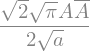

In [31]:
sp.integrate(Psi0 * Psi0.conjugate(), (x, -sp.oo, sp.oo)).simplify()

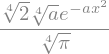

In [32]:
Psi0 = Psi0.subs(A, (2 * a / sp.pi) ** sp.Rational(1, 4))
Psi0

$$\tilde{\psi}(k)=(u_k, \Psi(x, 0))$$

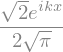

In [33]:
uk = 1 / sp.sqrt(2 * sp.pi) * sp.exp(sp.I * k * x)
uk

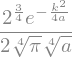

In [34]:
Psik = sp.integrate(uk.conjugate() * Psi0, (x, -sp.oo, sp.oo)).simplify()
Psik

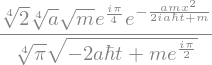

In [37]:
Psixt = sp.integrate(Psik * uk * sp.exp(-sp.I * h * k**2 * t / (2 * m)), (k, -sp.oo, sp.oo), conds = 'none').simplify()
Psixt

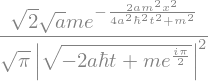

In [41]:
(sp.Abs(Psixt)**2)

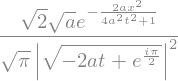

In [42]:
(sp.Abs(Psixt)**2).subs({h: 1, m: 1})

In [52]:
psit = lambdify((x, t, a), (sp.Abs(Psixt)**2).subs({h: 1, m: 1}), modules = ['numpy', {'exp_polar': np.exp}])

In [53]:
psit(1, 1, 1)

In [57]:
fig = plt.figure()
ax = plt.axes(xlim = (-2, 2), ylim = (0, 0.75))
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.01
plt.close()

xs = np.linspace(-2, 2, 1000)

def animate(i):
    line1.set_data(xs, psit(xs, dt * i, 0.5))
    line2.set_data(xs, (2 * 0.5 / np.pi)**(1/2)*np.exp(-2 * 0.5 * xs**2))
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())